### Problema

Para empezar la empresa quiere investigar las diferencias clave entre los empleados que han dejado la organización y los que permanecen en ella. Para ello, nos han pedido que realicemos una serie de análisis los cuales tenemos descritos a continuación: 

1. ¿Existe una diferencia en la edad promedio entre los empleados que han dejado la empresa y los que no?

2. ¿Existe una diferencia en el ingreso mensual promedio entre empleados que han dejado la empresa y los que no?

3. ¿Existe una diferencia en la proporción de empleados que hacen horas extras entre los que han dejado la empresa y los que no?

4. ¿Existe una diferencia en los años promedio trabajados con el mismo gerente entre empleados que han dejado la empresa y los que no?

5. ¿Existe una diferencia en los años desde la última promoción entre los empleados que han dejado la empresa y los que no?

Basándonos en los resultados de los análisis anteriores, escribe aquellos factores que parecen estar más asociados con los empleados que han dejado la empresa en comparación con los que se han quedado.

Llegados a este punto, ya sabemos y hemos identificado algunos patrones importantes entre los empleados que han dejado la empresa y los que no. Investiguemos ahora que esta ocurriendo entre los empleados que han dejado la empresa a traves de las siguientes preguntas: 

- Analiza a los empleados que tienen más de 10 años de experiencia en la empresa y examina cómo varía su tasa de incremento salarial y sus horas estándar de trabajo según su nivel de satisfacción laboral y estado civil.

- Ahora deberéis focalizaros en los empleados casados que tienen una alta satisfacción con su entorno laboral y que pertenecen al departamento de `'Research & Development'`. Deberéis evaluar cómo varían el tiempo desde su última promoción y los años que han estado en su rol actual según su género.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Esto es para poder hacer gráficos
import seaborn as sns
import re

In [2]:
df = pd.read_csv("datos/IBM_HR_Employee_Attrition_full.csv")
pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,0,21,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium
1,1,25,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,0,4,Y,7.0,España,1,No,Non-Travel,641.0,Sales,1,85,2,Sales Executive,4736,6069,Yes,12,80.0,1,2,Very High,High,High,Excellent,Medium
2,2,1,College,Life Sciences,Male,Single,22,b5fed13f-7785-4daf-bb8c-1037f84e5fa7,2000-01-21 05:42:21,20,0,0,4,Y,0.0,República Checa,1,No,Travel_Rarely,581.0,Research & Development,1,63,1,Research Scientist,3375,17624,No,12,80.0,0,2,Very High,High,High,Excellent,Very High
3,3,4,College,Technical Degree,Male,Married,42,4b0a1169-b286-44fb-a453-b97ca934db57,2000-01-28 16:59:19,11,1,5,22,NaN,1.0,Misisipi,1,No,Travel_Rarely,532.0,Research & Development,1,58,5,Manager,19232,4933,No,11,80.0,0,3,High,High,Very High,Excellent,Very High
4,4,2,Master,Life Sciences,Female,Single,36,6affb754-8e52-43a7-9e97-4e373ef5fccb,2000-02-02 22:58:25,13,0,7,17,NaN,3.0,Portugal,1,No,Travel_Rarely,530.0,Sales,1,51,2,Sales Representative,4502,7439,No,15,80.0,0,2,High,High,Very High,Excellent,High
5,5,10,Bachelor,Medical,Male,Single,32,098c5463-e599-44ad-95f7-922ffe4b3d20,2000-02-06 14:19:30,15,0,0,10,NaN,2.0,Noruega,0,No,Travel_Rarely,495.0,Research & Development,1,64,3,Manager,11244,21072,No,25,80.0,0,5,High,High,Very High,Outstanding,Medium
6,6,6,Bachelor,Medical,Female,Married,43,69658f26-48fa-4573-8317-2668b70f54a9,2000-02-14 15:46:42,4,0,6,21,NaN,7.0,Italia,0,No,Travel_Rarely,NaN,Research & Development,1,81,5,Manager,19392,22539,No,13,80.0,0,2,Low,Medium,High,Excellent,Very High
7,7,28,Below College,Medical,Male,Married,50,e3b6a3f7-9046-494f-a3a3-396caa04c5b8,2000-02-19 14:51:34,2,0,2,20,Y,1.0,Bélgica,1,No,Travel_Rarely,1207.0,Research & Development,1,74,1,Laboratory Technician,3221,3297,Yes,11,80.0,3,3,Very High,Very High,High,Excellent,High
8,8,6,Bachelor,Medical,Female,Divorced,38,0ce9edf2-7655-47ab-918d-2e6f511ace72,2000-02-22 11:00:45,4,0,8,17,NaN,7.0,Croacia,1,No,Non-Travel,573.0,Research & Development,1,79,2,Research Scientist,5329,15717,Yes,12,NaN,3,3,Medium,Low,Very High,Excellent,Very High
9,9,9,Master,Life Sciences,Male,Married,41,4c27df95-d97d-4165-8792-f39a3477a650,2000-03-04 21:27:50,23,1,1,7,Y,2.0,Grecia,0,No,Travel_Rarely,933.0,Research & Development,1,94,1,Laboratory Technician,2238,6961,No,21,NaN,1,2,High,High,Low,Outstanding,Very High


In [3]:
filtro1 = df["Attrition"] == "Yes"
filtro2 = df["Attrition"] == "yes"

df_desempleado = df[filtro1|filtro2]
df_desempleado.head(1)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,0,21,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


In [4]:
filtro1 = df["Attrition"] == "No"
filtro2 = df["Attrition"] == "no"

df_empleado = df[filtro1|filtro2]
df_empleado.head(1)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
1,1,25,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,0,4,Y,7.0,España,1,No,Non-Travel,641.0,Sales,1,85,2,Sales Executive,4736,6069,Yes,12,80.0,1,2,Very High,High,High,Excellent,Medium


1. ¿Existe una diferencia en la edad promedio entre los empleados que han dejado la empresa y los que no?

In [5]:
df_empleado.describe().T.head(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1233.0,732.562044,424.681016,1.0,365.0,730.0,1093.0,1469.0


In [6]:
df_desempleado.describe().T.head(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,237.0,744.582278,424.290633,0.0,391.0,751.0,1127.0,1457.0


Edad media de los empleados = 37.5

Edad media de los que han dejado la empresa = 33.6

La mediana y la media de ambos datos son muy próximas.


2. ¿Existe una diferencia en el ingreso mensual promedio entre empleados que han dejado la empresa y los que no?

Sueldo mensual promedio de los empleados = 6832.7 y la mediana 5204

Sueldo mensual promedio de los que han dejado la empresa = 4787.1 y la mediana 3202.


3. ¿Existe una diferencia en la proporción de empleados que hacen horas extras entre los que han dejado la empresa y los que no?

In [7]:
df_empleado["OverTime"].value_counts()/df_empleado.shape[0]*100

OverTime
No     76.561233
Yes    23.438767
Name: count, dtype: float64

In [8]:
df_desempleado["OverTime"].value_counts()/df_desempleado.shape[0]*100

OverTime
Yes    53.586498
No     46.413502
Name: count, dtype: float64

De los empleados el 23.4% hacen horas extra.

De los que han dejado la empresa el 53.6% hacían horas extra.

4. ¿Existe una diferencia en los años promedio trabajados con el mismo gerente entre empleados que han dejado la empresa y los que no?

Los empleados han estado una media de 2.2 años con su actual manager.

Los que han dejado la empresa han estado una media de 1.4 años con su último manager.

5. ¿Existe una diferencia en los años desde la última promoción entre los empleados que han dejado la empresa y los que no?

Los empleados tienen una media de 1.1 años desde la ultima promocion.

Los que han dejado la empresa tenían una media de 0.9 años desde la ultima promocion.

In [ ]:
filtro = df_desempleado["TotalWorkingYears"] > 10
df_desempleado_10 = df_desempleado[filtro]
df_desempleado_10.groupby(["JobSatisfaction", "MaritalStatus"]).mean(numeric_only=True)[["StandardHours", "PercentSalaryHike"]].head(1)

,,StandardHours,PercentSalaryHike
JobSatisfaction,MaritalStatus,,
High,Divorced,80.0,16.5


In [ ]:
filtro = df_desempleado["MaritalStatus"] == "Married"
filtro1 = df_desempleado["EnvironmentSatisfaction"] == "High"
filtro2 = df_desempleado["Department"] == "Research & Development"
df_desempleado_casado_reach = df_desempleado[filtro & filtro1 & filtro2]
df_desempleado_casado_reach.groupby("Gender").mean(numeric_only=True)[["YearsSinceLastPromotion", "YearsInCurrentRole"]].head(1)

,YearsSinceLastPromotion,YearsInCurrentRole
Gender,,
Female,0.5,3.666667


In [ ]:
df_desempleado_casado_reach.groupby("Gender").median(numeric_only=True)[["YearsSinceLastPromotion", "YearsInCurrentRole"]]

,YearsSinceLastPromotion,YearsInCurrentRole
Gender,,
Female,0.0,2.5
Male,0.0,2.0


***Facts:***  
  
Hemos comprobado que los empleados que abandonaron la empresa en media son más jóvenes (33,6 frente a 37,5), cobraban menos (4787,1 frente a 6832,7) pero ambos tienen datos atípicos al alza (Es decir, alguna persona que cobra mucho y descuadra la media), muchos de ellos hacían horas extras (53,6% frente al 23,4% de los empleados actuales), han estado menos años con el mismo manager(1,4 años frente a 2,2 años) y han sido promoconados en menos de un año frente al año de un empleado actual.

Además los que abandonaron 

**Conclusiones:**  

Estos datos nos pueden indicar que los empleados que abandonaron la empresa pudieron tener como aliciente las malas condiciones salariales y de cumplimiento de horas pactadas en el contrato. Además, la empresa parece haberse centrado en promocionar más rápido a estos disertantes (esto a su vez explica porque están menos años en media con el mismo manager) lo que podría estar desequilibrando el ratio salario-responsabilidades lo que podría ser otra razón. Como posible solución IBM podría restructurar sus sistemas de recompensas y que cada promoción venga acompañada de un equilibrio entre el aumento de carga de trabajo y el aumento salarial.




Sobre los empleados que llevan más de 10 años en la empresa, se observa como los solteros cuentan con  



***GRAFICOS***


*Comparar categórica con numérica*

***Boxplot***

C:\Users\jaime\AppData\Local\Temp\ipykernel_22860\2116370163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age",


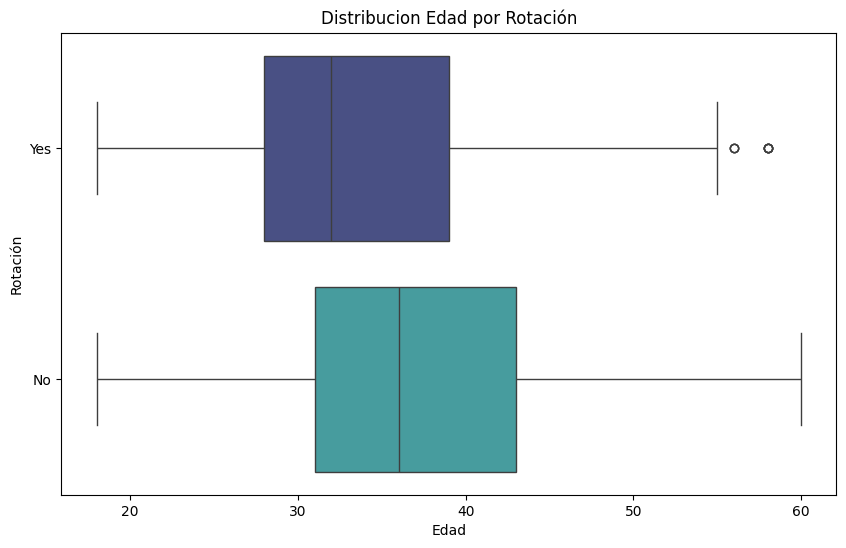

In [12]:
plt.figure(figsize= (10,6))
sns.boxplot(x="Age",
            y="Attrition",
            data= df,
            palette= 'mako')                 
plt.title("Distribucion Edad por Rotación")
plt.xlabel("Edad")
plt.ylabel("Rotación")
plt.show()

- Mediana: linea central de la caja
- Cuartil 25%: linea baja de la caja
- Cuartil 75%: linea alta de la caja
- Max y Min (de los valores regulares): Las líneas que forman un intervalo
- Valor atípico: Los puntos

***Barplot***

C:\Users\jaime\AppData\Local\Temp\ipykernel_22860\1160316102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Attrition",


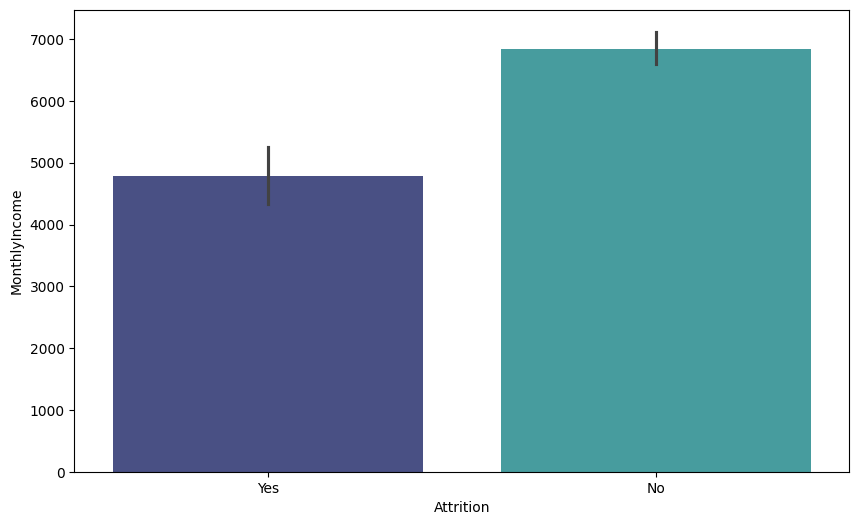

In [13]:
plt.figure(figsize= (10,6))
sns.barplot(x= "Attrition",
            y= "MonthlyIncome",
            data= df,
            palette= "mako");

- La línea: es un intervalo de confianza al 95% ci= 99% nos daría un nivel de confianza al 99% (También errorbar("ci"= 99)) También se puede elegir que queremos que represente la línea (ci es Intervalo e confianza, std es la desviación típico, None si no queremos q salgan) 
- La media: es hasta donde llega la barra

<Axes: xlabel='Attrition', ylabel='count'>

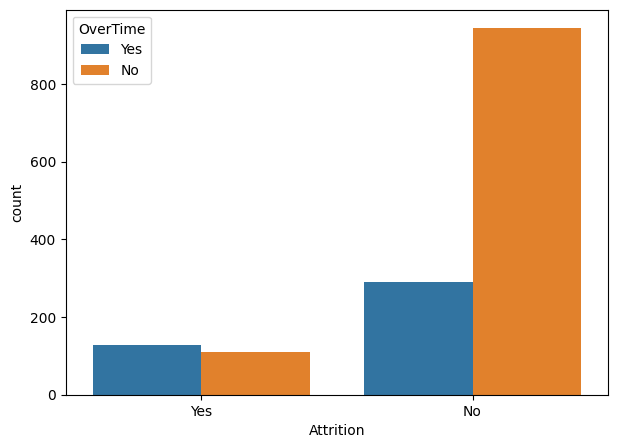

In [14]:
plt.figure(figsize= (7,5))
sns.countplot(x= "Attrition",
              hue= "OverTime",      #Al añadir el hue nos está haciendo un groupby automáticamente
              data= df,
              )      #stat= "percent" es para cambiar el eje a porcentajes(Pero CUIDADO que no me cambian los valores, habría que darselo en porcentaje)

**Para mostrar gráficos seguidos y q se puedan comparar**

C:\Users\jaime\AppData\Local\Temp\ipykernel_22860\3326598531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])  #El ; es para que no salga la info del g´rafico escrito arriba


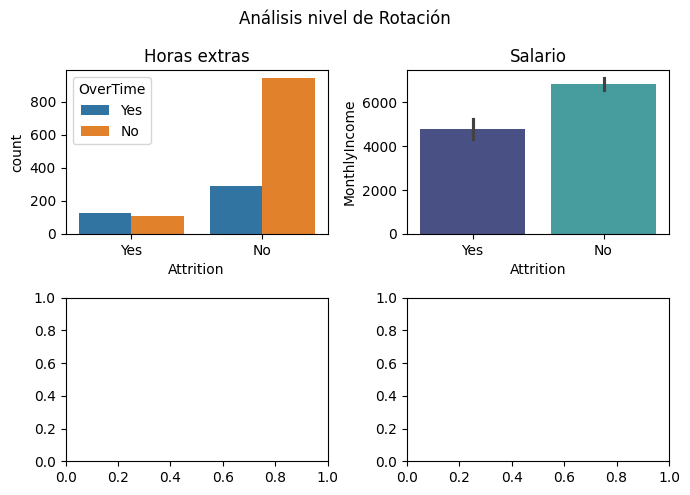

In [15]:
fig, axes= plt.subplots(2,2,figsize= (7,5))       #Axes es como una lista de graficos por eso ponemos uno en el índice 0 el primer 2 es número de filas y el segundo de columnas
sns.countplot(x= "Attrition",hue= "OverTime", data= df, ax = axes[0][0]) 
sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])  #El ; es para que no salga la info del g´rafico escrito arriba 
                                         #Esto optimiza el espacio para que no se 
axes[0][0].set_title("Horas extras")
axes[0][1].set_title("Salario")
plt.suptitle("Análisis nivel de Rotación")     #Esto te pone un título comun da los dos gráficos
plt.tight_layout();                                                      


<Axes: xlabel='Age', ylabel='MonthlyIncome'>

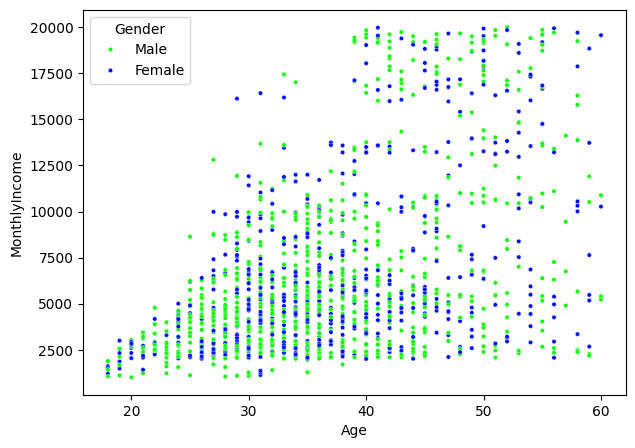

In [16]:
plt.figure(figsize= (7,5))
sns.scatterplot(x= "Age", y = "MonthlyIncome",hue= "Gender", palette="hsv", data= df, s=10)    #La s es para cambiar el tamaño de los puntos En el hue siempre tienen q ir categoricos

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

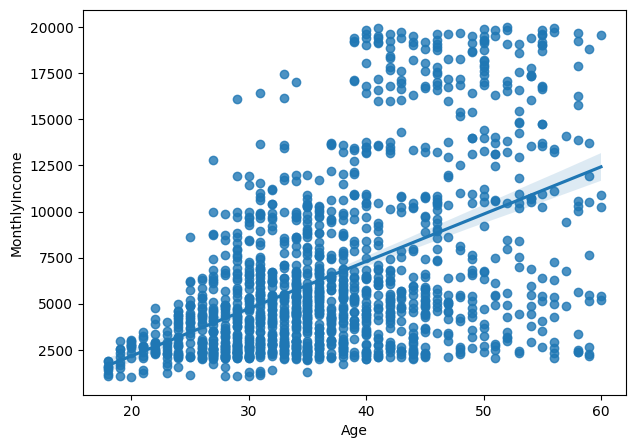

In [17]:
plt.figure(figsize= (7,5))
sns.regplot(x= "Age", y = "MonthlyIncome", data= df)    #La s es para cambiar el tamaño de los puntos En el hue siempre tienen q ir categoricos

C:\Users\jaime\AppData\Local\Temp\ipykernel_22860\216877301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])  #El ; es para que no salga la info del g´rafico escrito arriba


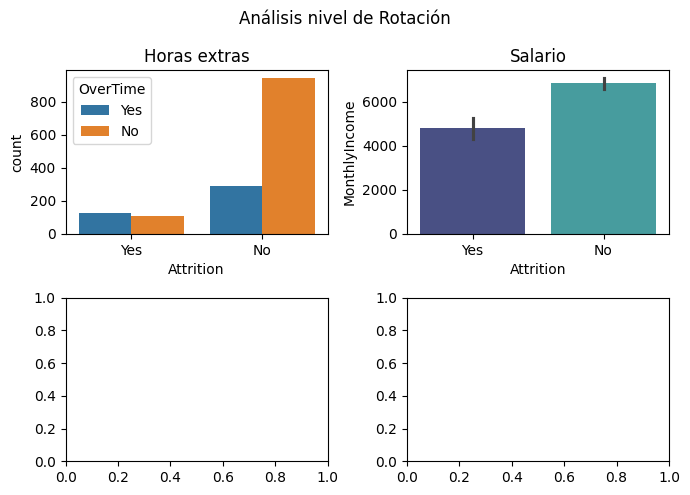

In [18]:
fig, axes= plt.subplots(2,2,figsize= (7,5))       #Axes es como una lista de graficos por eso ponemos uno en el índice 0 el primer 2 es número de filas y el segundo de columnas
sns.countplot(x= "Attrition",hue= "OverTime", data= df, ax = axes[0][0]) 
sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])  #El ; es para que no salga la info del g´rafico escrito arriba 
                                         #Esto optimiza el espacio para que no se 
axes[0][0].set_title("Horas extras")
axes[0][1].set_title("Salario")
plt.suptitle("Análisis nivel de Rotación")     #Esto te pone un título comun da los dos gráficos
plt.tight_layout();            

In [19]:
df.columns

Index(['Unnamed: 0', 'DistanceFromHome', 'Education', 'EducationField',
       'Gender', 'MaritalStatus', 'Age', 'EmployeeId', 'DateEmployment',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalWorkingYears', 'Over18', 'NumCompaniesWorked', 'Country', 'Sons',
       'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EmployeeCount', 'HourlyRate', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction'],
      dtype='object')

Debéis explorar si la satisfacción laboral esta relacionada con los salarios de los empleados.



Deberéis examinar la relación entre la satisfacción laboral y el número de formaciones a lo largo del tiempo.

In [20]:
df["DateEmployment"] = pd.to_datetime(df["DateEmployment"], format= "mixed")

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jaime\AppData\Local\Packages\Py

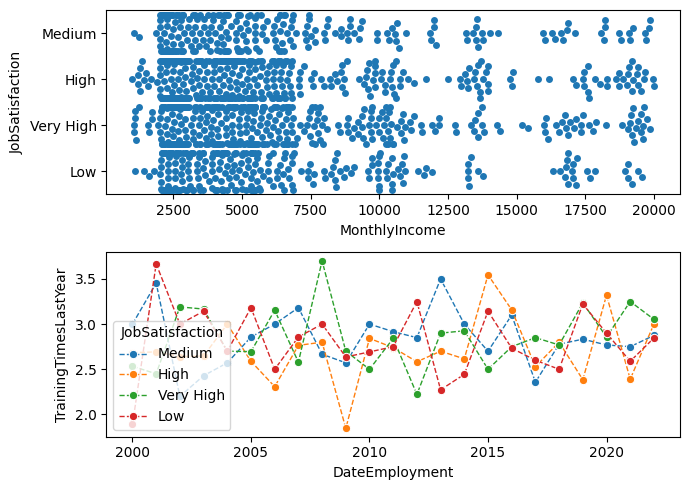

In [21]:
fig, axes= plt.subplots(nrows = 2, ncols = 1, figsize= (7,5), sharex= False)
sns.swarmplot(x ="MonthlyIncome" , y= "JobSatisfaction", data= df, ax= axes[0])
sns.lineplot(x= df["DateEmployment"].dt.year, y = "TrainingTimesLastYear",hue= "JobSatisfaction", marker= "o", linewidth= 1, linestyle= "dashed", errorbar= None,  data= df, ax= axes[1] )
plt.tight_layout()

C:\Users\jaime\AppData\Local\Temp\ipykernel_22860\2350328962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x= "MonthlyIncome", y= "JobSatisfaction", palette="mako", data= df)
C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jaime\AppData\Loca

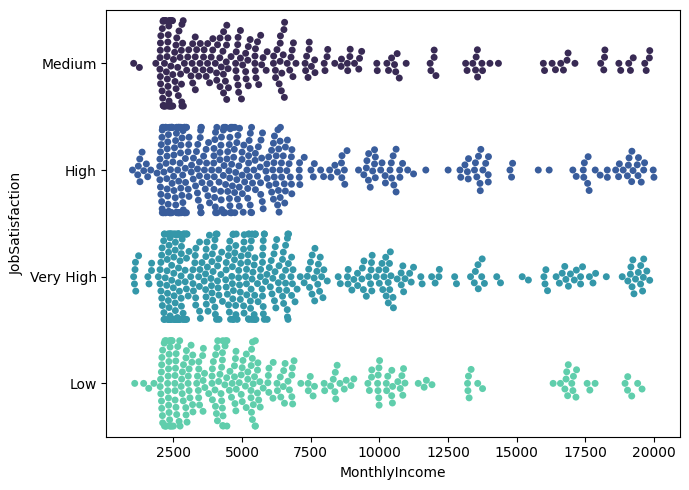

In [22]:
plt.figure(figsize= (7,5))
sns.swarmplot(x= "MonthlyIncome", y= "JobSatisfaction", palette="mako", data= df)
plt.tight_layout()

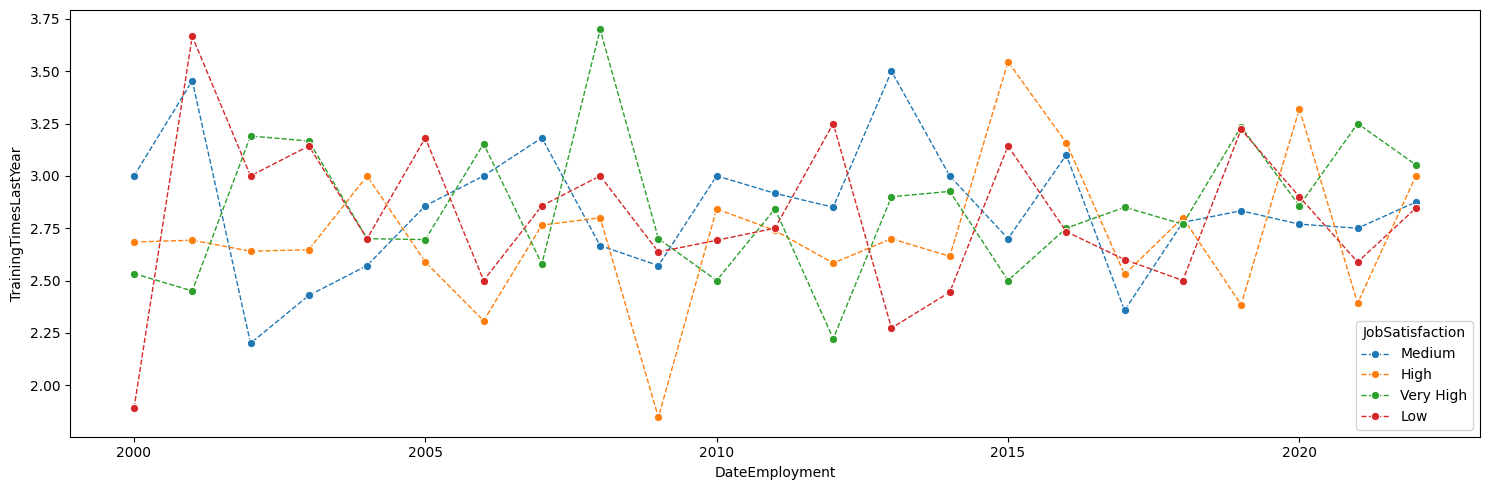

In [23]:
plt.figure(figsize= (15,5))
sns.lineplot(x= df["DateEmployment"].dt.year, y = df["TrainingTimesLastYear"],hue= "JobSatisfaction", marker= "o", linewidth= 1, linestyle= "dashed", errorbar= None,  data= df)
plt.tight_layout()

#### La proporción de empleados por género es un factor importante para analizar la diversidad dentro de la empresa. En esta gráfica, visualizaremos la distribución de empleados masculinos y femeninos, lo que nos permitirá observar si hay equilibrio entre ambos géneros dentro de la compañía.

In [24]:
proporcion= df["Gender"].value_counts(normalize= True)*100
proporcion

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1fc020ffe90>,
 [Text(-1.0461620947148778, -0.33991891912892863, 'Male'),
  Text(1.046162227084113, 0.33991851173834126, 'Female')],
 [Text(-0.5706338698444787, -0.18541031952487017, '60.0%'),
  Text(0.5706339420458798, 0.18541009731182248, '40.0%')])

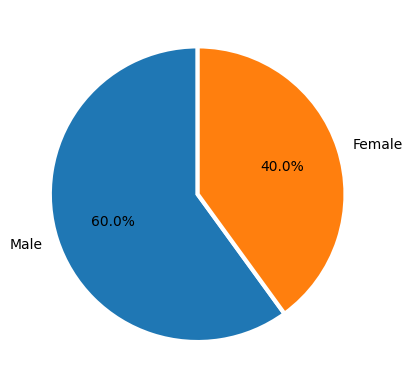

In [25]:
generos= ["Male", "Female"]
plt.pie(proporcion, labels= generos, labeldistance=1.10, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct= '%1.1f%%', startangle= 90)

***Limpieza y tratamiento de los dtos***

In [26]:
df.columns

Index(['Unnamed: 0', 'DistanceFromHome', 'Education', 'EducationField',
       'Gender', 'MaritalStatus', 'Age', 'EmployeeId', 'DateEmployment',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalWorkingYears', 'Over18', 'NumCompaniesWorked', 'Country', 'Sons',
       'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EmployeeCount', 'HourlyRate', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction'],
      dtype='object')

In [27]:
df["Gender"]= df["Gender"].str.lower()    #Pasar a minuscula toda la columna pero no el nombre de la columna (si se quiere cambair el nombre de la columna)
df.head(1)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,0,21,Bachelor,Other,male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


Cambiar nombre de columna

In [28]:
cambio_nombre_columna= {"Gender": "gender"}   #Se tienen que hacer un diccionario con la clave como nómbre actual y valor al q queremos cambiar
df.rename(columns= cambio_nombre_columna, inplace= True)  
df.head(1)

,Unnamed: 0,DistanceFromHome,Education,EducationField,gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,0,21,Bachelor,Other,male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


In [29]:
nuevo_nombre_columnas= {}   #Primero se crea un diccionario y se usa for para meter las columnas actuales como key y sus valores los nombres nuevos para OPCION 1
for column in df.columns:
    nuevo_nombre_columnas[column]= column.lower().replace(" ","")

nuevo_nombre_columnas

{'Unnamed: 0': 'unnamed:0',
 'DistanceFromHome': 'distancefromhome',
 'Education': 'education',
 'EducationField': 'educationfield',
 'gender': 'gender',
 'MaritalStatus': 'maritalstatus',
 'Age': 'age',
 'EmployeeId': 'employeeid',
 'DateEmployment': 'dateemployment',
 'YearsInCurrentRole': 'yearsincurrentrole',
 'YearsSinceLastPromotion': 'yearssincelastpromotion',
 'YearsWithCurrManager': 'yearswithcurrmanager',
 'TotalWorkingYears': 'totalworkingyears',
 'Over18': 'over18',
 'NumCompaniesWorked': 'numcompaniesworked',
 'Country': 'country',
 'Sons': 'sons',
 'Attrition': 'attrition',
 'BusinessTravel': 'businesstravel',
 'DailyRate': 'dailyrate',
 'Department': 'department',
 'EmployeeCount': 'employeecount',
 'HourlyRate': 'hourlyrate',
 'JobLevel': 'joblevel',
 'JobRole': 'jobrole',
 'MonthlyIncome': 'monthlyincome',
 'MonthlyRate': 'monthlyrate',
 'OverTime': 'overtime',
 'PercentSalaryHike': 'percentsalaryhike',
 'StandardHours': 'standardhours',
 'StockOptionLevel': 'stockopti

In [30]:
nuevo_nombre_columnas2 = {key: key.lower() for key in df.columns}  #Esta es otra opción más fácil de crear un diccionario cuando hay muchas columnas que queremos cambiar para OPCION 1
nuevo_nombre_columnas2

{'Unnamed: 0': 'unnamed: 0',
 'DistanceFromHome': 'distancefromhome',
 'Education': 'education',
 'EducationField': 'educationfield',
 'gender': 'gender',
 'MaritalStatus': 'maritalstatus',
 'Age': 'age',
 'EmployeeId': 'employeeid',
 'DateEmployment': 'dateemployment',
 'YearsInCurrentRole': 'yearsincurrentrole',
 'YearsSinceLastPromotion': 'yearssincelastpromotion',
 'YearsWithCurrManager': 'yearswithcurrmanager',
 'TotalWorkingYears': 'totalworkingyears',
 'Over18': 'over18',
 'NumCompaniesWorked': 'numcompaniesworked',
 'Country': 'country',
 'Sons': 'sons',
 'Attrition': 'attrition',
 'BusinessTravel': 'businesstravel',
 'DailyRate': 'dailyrate',
 'Department': 'department',
 'EmployeeCount': 'employeecount',
 'HourlyRate': 'hourlyrate',
 'JobLevel': 'joblevel',
 'JobRole': 'jobrole',
 'MonthlyIncome': 'monthlyincome',
 'MonthlyRate': 'monthlyrate',
 'OverTime': 'overtime',
 'PercentSalaryHike': 'percentsalaryhike',
 'StandardHours': 'standardhours',
 'StockOptionLevel': 'stockopt

In [31]:
nuevo_nombre_columnas2 = {key: key.lower() for key in df.columns}    #OPCIÓN 1 PARA CAMBIAR NOMBRES DE MUCHAS COLUMNAS
df.rename(columns= nuevo_nombre_columnas2, inplace= True)  
df.head(1)

,unnamed: 0,distancefromhome,education,educationfield,gender,maritalstatus,age,employeeid,dateemployment,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,totalworkingyears,over18,numcompaniesworked,country,sons,attrition,businesstravel,dailyrate,department,employeecount,hourlyrate,joblevel,jobrole,monthlyincome,monthlyrate,overtime,percentsalaryhike,standardhours,stockoptionlevel,trainingtimeslastyear,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,relationshipsatisfaction
0,0,21,Bachelor,Other,male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


In [32]:
df.columns = [name.lower() for name in df.columns]                        #OPCION 2 PARA CAMBIAR NOMBRES DE MUCHAS COLUMNAS
df.head(1)

,unnamed: 0,distancefromhome,education,educationfield,gender,maritalstatus,age,employeeid,dateemployment,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,totalworkingyears,over18,numcompaniesworked,country,sons,attrition,businesstravel,dailyrate,department,employeecount,hourlyrate,joblevel,jobrole,monthlyincome,monthlyrate,overtime,percentsalaryhike,standardhours,stockoptionlevel,trainingtimeslastyear,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,relationshipsatisfaction
0,0,21,Bachelor,Other,male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


***.Str.split()***

In [33]:
df["employeeid"].str.split("-", expand =True).get([0,1])          #Nos devuelve una lista que gracias al expand crea un dataframe creando una columna por cada string que splitea y el .get([]) nos da las columnas que queremos
                                                                  #No se puede poner un rango en el get porque solo llama a los índices correspondiete a cada columna individual

,0,1
0,70b8db40,4f58
1,0722da7a,530b
2,b5fed13f,7785
3,4b0a1169,b286
4,6affb754,8e52
...,...,...
1465,ee51e04a,ae21
1466,7229488d,28e5
1467,d612a787,00ab
1468,7261478d,ea6b


***str.extract***

In [34]:
df.head(2)

,unnamed: 0,distancefromhome,education,educationfield,gender,maritalstatus,age,employeeid,dateemployment,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,totalworkingyears,over18,numcompaniesworked,country,sons,attrition,businesstravel,dailyrate,department,employeecount,hourlyrate,joblevel,jobrole,monthlyincome,monthlyrate,overtime,percentsalaryhike,standardhours,stockoptionlevel,trainingtimeslastyear,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,relationshipsatisfaction
0,0,21,Bachelor,Other,male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium
1,1,25,College,Technical Degree,female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,0,4,Y,7.0,España,1,No,Non-Travel,641.0,Sales,1,85,2,Sales Executive,4736,6069,Yes,12,80.0,1,2,Very High,High,High,Excellent,Medium


In [35]:
patron= r"-(\w+-\w+)"                        #como reguex coge la primera coincidencia nos sirve
df["employeeid"].str.extract(patron).head(3)

,0
0,4f58-476f
1,530b-41dd
2,7785-4daf


In [36]:
patron= r"-(\w{4}-\w{4})"                      #como reguex coge la primera coincidencia nos sirve pero solo en este caso porque igual pasan a ser 5 y no 4
df["employeeid"].str.extract(patron).head(1)

,0
0,4f58-476f


In [37]:
df[df["numcompaniesworked"].isnull()].head(2)   

,unnamed: 0,distancefromhome,education,educationfield,gender,maritalstatus,age,employeeid,dateemployment,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,totalworkingyears,over18,numcompaniesworked,country,sons,attrition,businesstravel,dailyrate,department,employeecount,hourlyrate,joblevel,jobrole,monthlyincome,monthlyrate,overtime,percentsalaryhike,standardhours,stockoptionlevel,trainingtimeslastyear,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,relationshipsatisfaction
173,173,1,College,Life Sciences,male,Single,32,58fdb5cd-7a2b-4f6f-b73b-996a8535a807,2002-09-05 03:39:58,6,0,0,10,Y,NaN,Kansas,1,Yes,Travel_Rarely,964.0,Sales,1,34,2,Sales Executive,6735,12147,No,15,80.0,0,2,Low,Low,Medium,Excellent,Medium
198,198,1,NaN,Life Sciences,female,Single,38,249b18ac-bb3f-4216-bfbb-3752d276e1ff,2003-02-19 04:01:06,15,0,0,10,Y,NaN,Bélgica,1,No,Travel_Rarely,168.0,Research & Development,1,81,3,Manufacturing Director,7861,15397,Yes,14,80.0,0,4,High,High,High,Excellent,Very High


In [38]:
df["age"].dtype

dtype('int64')

***qcut***

In [39]:
pd.qcut(df["age"], q =4).unique()         #el ( indica que es abierto y no está incluido en ese grupo y ] significa cerrado con lo que si que incluye el dato en ese grupo
                                          #el unique lo hemos utilizado solo para ver lo que hay dentro
                                          #Nos lo corta po percentiles si es 4 nos dará el 25%,50% y 75% si pones 2 los cortará por 50% (mediana)

[(17.999, 30.0], (36.0, 43.0], (30.0, 36.0], (43.0, 60.0]]
Categories (4, interval[float64, right]): [(17.999, 30.0] < (30.0, 36.0] < (36.0, 43.0] < (43.0, 60.0]]

In [40]:
qcut_=pd.qcut(df["age"], q =4)
qcut_.reset_index()  #Eso es solo para que me lo haga dataframe

,index,age
0,0,"(17.999, 30.0]"
1,1,"(17.999, 30.0]"
2,2,"(17.999, 30.0]"
3,3,"(36.0, 43.0]"
4,4,"(30.0, 36.0]"
...,...,...
1465,1465,"(17.999, 30.0]"
1466,1466,"(36.0, 43.0]"
1467,1467,"(17.999, 30.0]"
1468,1468,"(17.999, 30.0]"


In [41]:
qcut_.dtype     #Nuevo tipo de dato CATEGORY 

CategoricalDtype(categories=[(17.999, 30.0], (30.0, 36.0], (36.0, 43.0], (43.0, 60.0]], ordered=True, categories_dtype=interval[float64, right])

***pd.cut***

In [42]:
df["age_cut_labels"]= pd.cut(df["age"], bins= [df["age"].min()-1,25,35,45,55,df["age"].max()], labels = ["Niños","Joven","joven-adulto","Adulto","senior"])   #aqui seleccionamos los números (si no se pone el min(18) nos lo pone con valores nulos) Se puede elegir a partir de que palor quieres cortar.
df["age_cut"]= pd.cut(df["age"], bins= [df["age"].min()-1,25,35,45,55,df["age"].max()])
df[["age_cut_labels", "age_cut"]]                                                                #al poner min y max el valor min no me lo va a incluir porque va a estar en ( por eso se pone -1 



,age_cut_labels,age_cut
0,Niños,"(17, 25]"
1,Joven,"(25, 35]"
2,Niños,"(17, 25]"
3,joven-adulto,"(35, 45]"
4,joven-adulto,"(35, 45]"
...,...,...
1465,Joven,"(25, 35]"
1466,joven-adulto,"(35, 45]"
1467,Niños,"(17, 25]"
1468,Niños,"(17, 25]"


***Apply***

In [43]:
def grupo_edad(edad):
    if edad in range(18,26):
        return "Joven"
    elif edad in range(26,35):
        return "A.Joven"
    elif edad in range(35,45):
        return "Adulto"
    elif edad in range(45,55):
        return "Senior"    
    else:
        return "No está en el rango"

grupo_edad(45)

'Senior'

In [44]:
df["age"].apply(grupo_edad)    #Apply aplica una función a todos los elementos de una columna IMPORTANTE QUE LAS FUNCIONES TENGAN RETURN PARA QUE NO DE NONE

0         Joven
1       A.Joven
2         Joven
3        Adulto
4        Adulto
         ...   
1465    A.Joven
1466     Adulto
1467      Joven
1468      Joven
1469    A.Joven
Name: age, Length: 1470, dtype: object

una funcion q  reciba una fecha y q a partir de esa fecha permita calcular la antiguedad de los empleados

In [45]:
from datetime import datetime

df['dateemployment'] = pd.to_datetime(df['dateemployment']).dt.year   #al escribir el igual lo estoy sobre escribiendo si en vez de df['dateemployment'] = cambio el nombre dateempleado s ecrea una nueva columna

datetime.now().year


def culcular_antiguedad(anio): 
    print('datetime --> ', datetime.now().year )
    print('anio --> ', anio )
    return (datetime.now().year - anio)

culcular_antiguedad(2020)

datetime -->  2024
anio -->  2020


4

In [46]:
df['antiguedad'] = df['dateemployment'].apply(culcular_antiguedad)

datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  2024
anio -->  2000
datetime -->  

***apply con lambda***

In [47]:
df["dateemployment"].apply(lambda fecha: (datetime.today() - pd.to_datetime(fecha)).days/365)

0       54.813699
1       54.813699
2       54.813699
3       54.813699
4       54.813699
          ...    
1465    54.813699
1466    54.813699
1467    54.813699
1468    54.813699
1469    54.813699
Name: dateemployment, Length: 1470, dtype: float64

empleados q se han ido y empleados que no. para los que siguen calculamos antiguedad y para los que no pues no se calcula la antigüedad

In [48]:


def anti(fecha,continuidad):
    if continuidad == "No":
        year_now = datetime.now().year
        antigue= year_now - pd.to_datetime(fecha).year
        return antigue
    else:
        return np.nan
    
anti(2010,"No")    

54

In [49]:
df[["dateemployment", "attrition"]].apply(anti())

TypeError: anti() missing 2 required positional arguments: 'fecha' and 'continuidad'

In [285]:
df.apply(lambda x: anti(x["dateemployment"], x["attrition"]), axis=1)   #para utilizar apply con una función de dos o más parametros siempre usar lambda y especificar donde encontarr las columnas (axis=1) 

0        NaN
1       54.0
2       54.0
3       54.0
4       54.0
        ... 
1465    54.0
1466    54.0
1467    54.0
1468    54.0
1469    54.0
Length: 1470, dtype: float64

In [386]:
dicc_map= {0:True,1:False}
df["sons"]= df["sons"].map(dicc_map)
df["sons"].unique()

array([False,  True])

In [51]:
df["sons"].replace({0:"No",1:"Si"}).unique()        #El map permite remplazay y aplicar funciones mientras que replace solo remplaza
                                                    #Otra diferencia map si no encuentra lo vuelve nulo mientras que replace te deja el valor (mejor map para que aparezca nulo)
                                                    

array(['Si', 'No'], dtype=object)

In [54]:
string1= "3,12"
string1.replace(",",".")

'3.12'